# Progetto DeepGuard Cybersecurity

## Panoramica
DeepGuard Inc., leader nella cybersicurezza per il settore sanitario, affronta la crescente complessità e sofisticazione degli attacchi informatici. Proteggere le informazioni sensibili dei pazienti e garantire la conformità normativa sono elementi fondamentali per mantenere la fiducia dei clienti e la sicurezza dei dati.

Questo progetto sfrutta tecniche di **Apprendimento per Rinforzo (Reinforcement Learning, RL)** per simulare e mitigare scenari di attacco/difesa utilizzando l’ambiente [`gym-idsgame`](https://github.com/Limmen/gym-idsgame).  
L’obiettivo è rafforzare le strategie difensive, identificare le vulnerabilità e ottimizzare l’allocazione delle risorse tramite l’automazione.

---

## Benefici del Progetto
- **Difesa potenziata**: addestrare agenti difensivi in ambienti simulati per sviluppare strategie di protezione robuste e adattive.  
- **Rilevamento delle vulnerabilità**: simulare attacchi per identificare e correggere le debolezze del sistema prima che vengano sfruttate da aggressori reali.  
- **Innovazione tecnologica**: applicare tecniche avanzate di RL per migliorare continuamente le difese di cybersicurezza.  
- **Ottimizzazione delle risorse**: automatizzare le simulazioni di attacco/difesa per ridurre il carico di lavoro umano e aumentare l’efficienza.

---

## Obiettivi
1. **Algoritmo SARSA**  
   - Applicare SARSA per affrontare scenari di “attacco casuale” nell’ambiente `gym-idsgame`.

2. **Double Deep Q-Network (DDQN)**  
   - Implementare DDQN con PyTorch per gestire scenari di “attacco casuale” e “attacco massimo”.

---

## Consegne
- Un notebook Google Colab suddiviso in due sezioni principali:  
  1. **Implementazione SARSA**  
  2. **Implementazione DDQN**


---

## Motivazione
La cybersicurezza nel settore sanitario è una priorità assoluta per **GreenGuard Solutions**.  
Applicando l’Apprendimento per Rinforzo per simulare e mitigare i rischi informatici, l’azienda rafforza le proprie capacità difensive e garantisce la protezione dei dati sensibili dei pazienti.

Questo progetto evidenzia l’integrazione di tecniche di intelligenza artificiale all’avanguardia con le sfide pratiche della cybersicurezza per proteggere le reti sanitarie da minacce sempre più avanzate.

---

⚡ **Obiettivo**: proteggere i dati dei pazienti e mantenere l’integrità delle informazioni sanitarie sviluppando soluzioni di cybersicurezza adattive, intelligenti e automatizzate.


In [ ]:
#!pip install gymnasium
#!pip install matplotlib



L'installazione di gym-idsgame mi ha dato parecchi problemi. Con "pip install gym-idsgame" falliva. Alla fine ho scaricato le repository da github e fatto l'installazione da dentro la cartella. Inoltre lo script "random_attack_bot_agent.py" richiede di essere modificato a mano, inserendo un import "from gym_idsgame.envs.util import idsgame_util" alla riga 62


In [ ]:

#!git clone https://github.com/Limmen/gym-idsgame.git
import os
os.chdir("./gym-idsgame")
os.getcwd()
#!pip3 install -e .

Importiamo le librerie necessarie

In [ ]:
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import gym_idsgame
from gym_idsgame.envs.idsgame_env import IdsGameRandomAttackV21Env

Gym-idsgame mi ha dato ha incompatibilità con Python 3.12 e le versioni più aggiornate  Gym/Gymnasium. Per questo non possiamo usarlo direttamente. Ho quindi creato un wrapper per renderli compatibili (su suggerimento del tutor)

In [ ]:
def reset_env(env):
    result = env.reset()

    return result[0] if isinstance(result, tuple) else result

def step_env(env, action):
    result = env.step(action)

    if len(result) == 5:
        obs, rew, term, trunc, info = result
        done = term or trunc
        return obs, rew, done, info
    else:
        return result

# Random Attack
Carichiamo il nostro env random attack da gym-idsgame e leggiamolo con le funzioni wrapper che abbiamo creato

In [ ]:
env = gym.make("idsgame-random_attack-v21").unwrapped

# reset compatibile Gymnasium
state = reset_env(env)
print("Stato iniziale:", state)

# Proviamo per esempio a compiere uno step dell'env (qui anche il difensore compie azione casuale)
defender_action = env.action_space.sample()
attacker_action = env.action_space.sample()  # random attack interno
action_tuple = (attacker_action, defender_action)

next_state, reward, done, info = step_env(env, action_tuple)
print("Next state:", next_state)
print("Reward:", reward, "Done:", done, "Info:", info)

Stato iniziale: [[ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  1. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]]
Next state: [[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]]
Reward: (0, 0) Done: False Info: {'moved': False}


In [ ]:
print("Informazioni del nostro env:")
print(f"Observation Space: {env.observation_space}")
print(f"Attacker Action Space: {env.attacker_action_space}")
print(f"Defender Action Space: {env.defender_action_space}")

Informazioni del nostro env:
Observation Space: Box(0, 9, (1, 5), int32)
Attacker Action Space: Discrete(20)
Defender Action Space: Discrete(20)


In [ ]:
# Stampiamo un po' di step e stampiamo le reward dell'attaccante e del difensore
state = reset_env(env)
done = False
step_num = 0

while not done and step_num < 10:
    defender_action = env.action_space.sample()
    attacker_action = env.action_space.sample()
    action_tuple = (attacker_action, defender_action)

    next_state, reward, done, info = step_env(env, action_tuple)
    reward_attack = reward[0]
    reward_def = reward[1]

    print(f"Step {step_num}")
    print(f"State {state}")
    print("Defender action:", defender_action)
    print("Attacker action:", attacker_action)
    print("Next state:", next_state)
    print("Reward attack:", reward_attack)
    print("Reward defender:", reward_def)
    print(info)
    print("-" * 30)

    state = next_state
    step_num += 1

Step 0
State [[ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  1. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]]
Defender action: 3
Attacker action: 5
Next state: [[ 1.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  1. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]]
Reward attack: 0
Reward defender: 0
{'moved': False}
------------------------------
Step 1
State [[ 1.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  1. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]]
Defender action: 17
Attacker action: 1
Next state: [[ 2.  0.  0.  0.  1. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 10. 10. 10. 10.  0.]]
Reward attack: -1
Reward defender: -26
{'moved': True}
------------------------------


## SARSA per Random_attack defence
Iniziamo il progetto con l’algoritmo SARSA per risolvere l’ambiente. SARSA è un algoritmo on-policy di Reinforcement Learning, quindi l’agente aggiorna la Q-table usando la politica che sta effettivamente seguendo.


### Struttura base dell'algoritmo SARSA

1. **Inizializza Q-table** `Q[state, action]` a 0

2. **Per ogni episodio:**
   - Reset dell’ambiente → ottieni `state`
   - Scegli `action` usando **epsilon-greedy** sulla Q-table

3. **Per ogni passo:**
   - Applica `action` → ottieni `next_state`, `reward`, `done`
   - Scegli `next_action` usando **epsilon-greedy**
   - Aggiorna Q-table:
   \[
Q(S_t, A_t) = Q(S_t, A_t) + \alpha \Big( R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \Big)
\]

Dove:

- \(S_t\) = stato corrente  
- \(A_t\) = azione corrente  
- \(R_{t+1}\) = reward ricevuto  
- \(S_{t+1}\) = stato successivo  
- \(A_{t+1}\) = azione successiva (scelta epsilon-greedy)  
- \(\alpha\) = learning rate  
- \(\gamma\) = discount factor


Ep 500 - Avg Reward(last 500): 23.418, Avg Steps(last 500): 5.05, Epsilon: 0.606, Cumul: 11745.000


Ep 1000 - Avg Reward(last 500): 21.576, Avg Steps(last 500): 4.76, Epsilon: 0.367, Cumul: 22533.000
Checkpoint salvato in sarsa_defender.pkl


Ep 1500 - Avg Reward(last 500): 22.690, Avg Steps(last 500): 4.95, Epsilon: 0.223, Cumul: 33878.000


Ep 2000 - Avg Reward(last 500): 21.690, Avg Steps(last 500): 4.76, Epsilon: 0.135, Cumul: 44723.000
Checkpoint salvato in sarsa_defender.pkl


Ep 2500 - Avg Reward(last 500): 22.822, Avg Steps(last 500): 5.01, Epsilon: 0.082, Cumul: 56134.000


Ep 3000 - Avg Reward(last 500): 22.170, Avg Steps(last 500): 4.88, Epsilon: 0.050, Cumul: 67219.000
Checkpoint salvato in sarsa_defender.pkl


Ep 3500 - Avg Reward(last 500): 22.284, Avg Steps(last 500): 4.91, Epsilon: 0.030, Cumul: 78361.000


Ep 4000 - Avg Reward(last 500): 21.710, Avg Steps(last 500): 4.82, Epsilon: 0.018, Cumul: 89216.000
Checkpoint salvato in sarsa_defender.pkl


Ep 4500 - Avg Reward(last 500): 21.902, Avg Steps(last 500): 4.82, Epsilon: 0.011, Cumul: 100167.000


Ep 5000 - Avg Reward(last 500): 23.740, Avg Steps(last 500): 5.19, Epsilon: 0.010, Cumul: 112037.000
Checkpoint salvato in sarsa_defender.pkl


Training SARSA Defender:  25%|██▌       | 5045/20000 [00:10<00:38, 390.80it/s]

Ep 5500 - Avg Reward(last 500): 21.904, Avg Steps(last 500): 4.81, Epsilon: 0.010, Cumul: 122989.000


Ep 6000 - Avg Reward(last 500): 22.356, Avg Steps(last 500): 4.88, Epsilon: 0.010, Cumul: 134167.000
Checkpoint salvato in sarsa_defender.pkl


Ep 6500 - Avg Reward(last 500): 22.978, Avg Steps(last 500): 5.04, Epsilon: 0.010, Cumul: 145656.000


Ep 7000 - Avg Reward(last 500): 22.098, Avg Steps(last 500): 4.85, Epsilon: 0.010, Cumul: 156705.000
Checkpoint salvato in sarsa_defender.pkl


Ep 7500 - Avg Reward(last 500): 22.194, Avg Steps(last 500): 4.90, Epsilon: 0.010, Cumul: 167802.000


Ep 8000 - Avg Reward(last 500): 23.322, Avg Steps(last 500): 5.12, Epsilon: 0.010, Cumul: 179463.000


Checkpoint salvato in sarsa_defender.pkl


Ep 8500 - Avg Reward(last 500): 22.788, Avg Steps(last 500): 4.99, Epsilon: 0.010, Cumul: 190857.000


Ep 9000 - Avg Reward(last 500): 22.564, Avg Steps(last 500): 4.97, Epsilon: 0.010, Cumul: 202139.000


Checkpoint salvato in sarsa_defender.pkl


Ep 9500 - Avg Reward(last 500): 21.720, Avg Steps(last 500): 4.79, Epsilon: 0.010, Cumul: 212999.000


Ep 10000 - Avg Reward(last 500): 22.210, Avg Steps(last 500): 4.91, Epsilon: 0.010, Cumul: 224104.000


Checkpoint salvato in sarsa_defender.pkl


Ep 10500 - Avg Reward(last 500): 22.052, Avg Steps(last 500): 4.81, Epsilon: 0.010, Cumul: 235130.000


Ep 11000 - Avg Reward(last 500): 21.350, Avg Steps(last 500): 4.71, Epsilon: 0.010, Cumul: 245805.000


Checkpoint salvato in sarsa_defender.pkl


Ep 11500 - Avg Reward(last 500): 21.296, Avg Steps(last 500): 4.71, Epsilon: 0.010, Cumul: 256453.000


Ep 12000 - Avg Reward(last 500): 23.012, Avg Steps(last 500): 5.01, Epsilon: 0.010, Cumul: 267959.000


Checkpoint salvato in sarsa_defender.pkl


Ep 12500 - Avg Reward(last 500): 21.862, Avg Steps(last 500): 4.82, Epsilon: 0.010, Cumul: 278890.000


Ep 13000 - Avg Reward(last 500): 22.352, Avg Steps(last 500): 4.89, Epsilon: 0.010, Cumul: 290066.000


Checkpoint salvato in sarsa_defender.pkl


Ep 13500 - Avg Reward(last 500): 22.508, Avg Steps(last 500): 4.95, Epsilon: 0.010, Cumul: 301320.000


Ep 14000 - Avg Reward(last 500): 22.188, Avg Steps(last 500): 4.92, Epsilon: 0.010, Cumul: 312414.000


Checkpoint salvato in sarsa_defender.pkl


Ep 14500 - Avg Reward(last 500): 22.278, Avg Steps(last 500): 4.91, Epsilon: 0.010, Cumul: 323553.000


Ep 15000 - Avg Reward(last 500): 22.244, Avg Steps(last 500): 4.85, Epsilon: 0.010, Cumul: 334675.000


Checkpoint salvato in sarsa_defender.pkl


Ep 15500 - Avg Reward(last 500): 22.590, Avg Steps(last 500): 4.97, Epsilon: 0.010, Cumul: 345970.000


Ep 16000 - Avg Reward(last 500): 21.576, Avg Steps(last 500): 4.82, Epsilon: 0.010, Cumul: 356758.000


Checkpoint salvato in sarsa_defender.pkl


Ep 16500 - Avg Reward(last 500): 20.812, Avg Steps(last 500): 4.61, Epsilon: 0.010, Cumul: 367164.000


Ep 17000 - Avg Reward(last 500): 22.572, Avg Steps(last 500): 4.97, Epsilon: 0.010, Cumul: 378450.000


Checkpoint salvato in sarsa_defender.pkl


Ep 17500 - Avg Reward(last 500): 22.698, Avg Steps(last 500): 4.94, Epsilon: 0.010, Cumul: 389799.000


Ep 18000 - Avg Reward(last 500): 21.840, Avg Steps(last 500): 4.82, Epsilon: 0.010, Cumul: 400719.000


Checkpoint salvato in sarsa_defender.pkl


Ep 18500 - Avg Reward(last 500): 21.770, Avg Steps(last 500): 4.83, Epsilon: 0.010, Cumul: 411604.000


Ep 19000 - Avg Reward(last 500): 21.292, Avg Steps(last 500): 4.70, Epsilon: 0.010, Cumul: 422250.000


Checkpoint salvato in sarsa_defender.pkl


Ep 19500 - Avg Reward(last 500): 23.102, Avg Steps(last 500): 5.10, Epsilon: 0.010, Cumul: 433801.000


Training SARSA Defender: 100%|██████████| 20000/20000 [00:42<00:00, 470.82it/s]


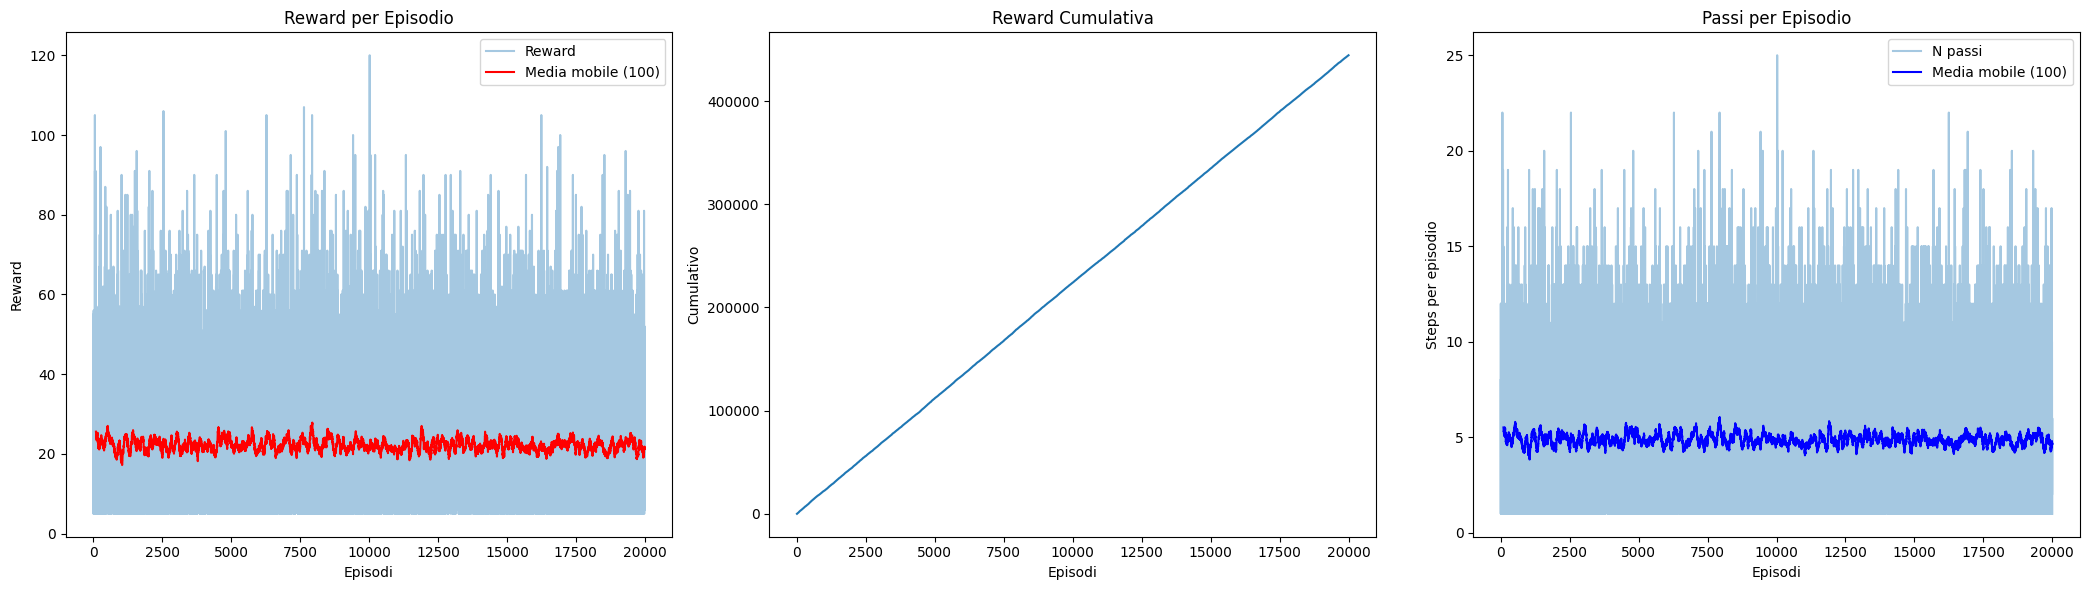

In [ ]:
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import pickle
import os

def moving_average(values, window_size):
    values = np.array(values)
    if len(values) < window_size:
        return np.full_like(values, np.mean(values))
    return np.convolve(values, np.ones(window_size)/window_size, mode='valid')


class SarsaDefender:
    def __init__(self, env, alpha=0.0001, gamma=0.999, epsilon=1.0, epsilon_decay=0.999, min_epsilon=0.01, bins=10, base_reward_offset=5, checkpoint_path='sarsa_defender.pkl', checkpoint_interval=1000):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.bins = bins
        self.base_reward_offset = base_reward_offset
        self.checkpoint_path = checkpoint_path
        self.checkpoint_interval = checkpoint_interval

        self.num_actions = self.env.num_defense_actions
        self.Q_defender = {}

        obs_sample = np.array(reset_env(self.env))
        self.obs_low = np.min(obs_sample)
        self.obs_high = np.max(obs_sample)

    def _discretize_state(self, state):
        state = np.array(state)
        state_flat = state.flatten()
        ratios = (state_flat - self.obs_low) / (self.obs_high - self.obs_low + 1e-5)
        discrete = np.floor(ratios * self.bins).astype(int)
        discrete = np.clip(discrete, 0, self.bins - 1)
        return tuple(discrete)

    def _ensure_state(self, state_key):
        if state_key not in self.Q_defender:
            self.Q_defender[state_key] = np.zeros(self.num_actions)

    def epsilon_greedy(self, state_key):
        self._ensure_state(state_key)
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.num_actions)
        else:
            return np.argmax(self.Q_defender[state_key])

    def save_checkpoint(self):
        with open(self.checkpoint_path, 'wb') as f:
            pickle.dump(self.Q_defender, f)
        print(f"Checkpoint salvato in {self.checkpoint_path}")

    def load_checkpoint(self):
        if os.path.exists(self.checkpoint_path):
            with open(self.checkpoint_path, 'rb') as f:
                self.Q_defender = pickle.load(f)
            print(f"Checkpoint caricato da {self.checkpoint_path}")

    def train(self, num_episodes=10000, render=False):
        rewards_per_episode = []
        cumulative_rewards = []
        steps_per_episode = []

        cum_reward = 0

        for ep in trange(num_episodes, desc="Training SARSA Defender"):
            state = reset_env(self.env)
            state_key = self._discretize_state(state)
            action = self.epsilon_greedy(state_key)

            done = False
            total_reward = 0
            steps = 0

            while not done:
                attacker_action = np.random.randint(self.env.num_attack_actions)
                next_state, reward, done, _ = step_env(self.env, (attacker_action, action))
                attacker_reward, defender_reward = reward

                defender_reward += self.base_reward_offset
                if attacker_reward < 0:
                    defender_reward += abs(attacker_reward)
                defender_reward = np.clip(defender_reward, 0, 10)

                total_reward += defender_reward
                cum_reward += defender_reward
                steps += 1

                next_state_key = self._discretize_state(next_state)
                next_action = self.epsilon_greedy(next_state_key)

                self._ensure_state(state_key)
                self._ensure_state(next_state_key)

                td_target = defender_reward + self.gamma * self.Q_defender[next_state_key][next_action] * (not done)
                td_error = td_target - self.Q_defender[state_key][action]
                self.Q_defender[state_key][action] += self.alpha * td_error

                state_key, action = next_state_key, next_action

                if render:
                    self.env.render()

            rewards_per_episode.append(total_reward)
            cumulative_rewards.append(cum_reward)
            steps_per_episode.append(steps)
            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

            if ep % 500 == 0 and ep > 0:
                avg_recent = np.mean(rewards_per_episode[-500:])
                avg_steps = np.mean(steps_per_episode[-500:])
                print(f"Ep {ep} - Avg Reward(last 500): {avg_recent:.3f}, Avg Steps(last 500): {avg_steps:.2f}, Epsilon: {self.epsilon:.3f}, Cumul: {cum_reward:.3f}")

            if ep % self.checkpoint_interval == 0 and ep > 0:
                self.save_checkpoint()

        return rewards_per_episode, cumulative_rewards, steps_per_episode

def plot_training(rewards, cumulative_rewards, steps, window=100):
    avg_reward = moving_average(rewards, window)
    avg_steps = moving_average(steps, window)

    fig, axes = plt.subplots(1, 3, figsize=(21,6))

    axes[0].plot(rewards, alpha=0.4, label='Reward')
    axes[0].plot(np.arange(window-1, len(rewards)), avg_reward, color='red', label=f'Media mobile ({window})')
    axes[0].set_title("Reward per Episodio")
    axes[0].set_xlabel("Episodi")
    axes[0].set_ylabel("Reward")
    axes[0].legend()

    axes[1].plot(cumulative_rewards)
    axes[1].set_title("Reward Cumulativa")
    axes[1].set_xlabel("Episodi")
    axes[1].set_ylabel("Cumulativo")

    axes[2].plot(steps, alpha=0.4, label='N passi')
    axes[2].plot(np.arange(window-1, len(steps)), avg_steps, color='blue', label=f'Media mobile ({window})')
    axes[2].set_title("Passi per Episodio")
    axes[2].set_xlabel("Episodi")
    axes[2].set_ylabel("Steps per episodio")
    axes[2].legend()

    plt.tight_layout()
    plt.show()


defender=SarsaDefender(env)
rewards_per_episode, cumulative_rewards, steps_per_episode= defender.train(num_episodes=20000)
plot_training(rewards_per_episode, cumulative_rewards, steps_per_episode)


La media mobile evidenzia che il reward per episodio rimane stabile e positivo durante tutto il training, mentre il reward cumulativo mostra una crescita costante e regolare nel tempo. Allo stesso modo, la media mobile della durata degli episodi resta costante. Questo è atteso in un ambiente random: anche se l’agente difensivo è efficace, la lunghezza degli episodi dipende dalla casualità degli attacchi. La stabilità indica che l’agente ha appreso una strategia consistente e affidabile

## DDQN algorithm
Passiamo ora alla seconda parte con l'implementazione dell'algoritmo DDQN da risolvere con Pytorch.

Il Double Deep Q-Network (DDQN) è un’estensione del classico Deep Q-Network (DQN) sviluppata per ridurre la sovrastima dei valori d’azione tipica degli algoritmi Q-learning basati su rete neurale.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import pickle
import os

class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class ReplayBuffer:
    def __init__(self, buffer_size=100000):
        self.buffer = deque(maxlen=buffer_size)
    def add(self, experience):
        self.buffer.append(experience)
    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)
    def __len__(self):
        return len(self.buffer)

class DDQNAgent:
    def __init__(self, state_size, action_size, device, lr=1e-3, gamma=0.99,
                 epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995,
                 batch_size=64, update_freq=1000, checkpoint_path='ddqn_agent.pth',
                 base_reward_offset=5):
        self.state_size = state_size
        self.action_size = action_size
        self.device = device
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.update_freq = update_freq
        self.checkpoint_path = checkpoint_path
        self.base_reward_offset = base_reward_offset

        self.q_net = QNetwork(state_size, action_size).to(device)
        self.target_net = QNetwork(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.q_net.state_dict())
        self.optimizer = optim.Adam(self.q_net.parameters(), lr=lr)
        self.memory = ReplayBuffer()
        self.learn_step = 0

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_size)
        state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        with torch.no_grad():
            q_values = self.q_net(state)
        return int(torch.argmax(q_values).cpu().item())

    def step(self, state, action, reward, next_state, done):
        self.memory.add((state, action, reward, next_state, done))
        self.learn_step += 1

        if len(self.memory) > self.batch_size:
            self.learn()
        if self.learn_step % self.update_freq == 0:
            self.target_net.load_state_dict(self.q_net.state_dict())

    def learn(self):
        batch = self.memory.sample(self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(np.vstack(states)).to(self.device)
        actions = torch.LongTensor(actions).unsqueeze(1).to(self.device)
        rewards = torch.FloatTensor(rewards).unsqueeze(1).to(self.device)
        next_states = torch.FloatTensor(np.vstack(next_states)).to(self.device)
        dones = torch.FloatTensor(dones).unsqueeze(1).to(self.device)

        curr_Q = self.q_net(states).gather(1, actions)
        next_actions = self.q_net(next_states).argmax(1).unsqueeze(1)
        next_Q = self.target_net(next_states).gather(1, next_actions)
        expected_Q = rewards + (1 - dones) * self.gamma * next_Q

        loss = nn.MSELoss()(curr_Q, expected_Q.detach())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def save_checkpoint(self):
        torch.save(self.q_net.state_dict(), self.checkpoint_path)
        print(f"Checkpoint salvato: {self.checkpoint_path}")

    def load_checkpoint(self):
        if os.path.exists(self.checkpoint_path):
            self.q_net.load_state_dict(torch.load(self.checkpoint_path))
            self.target_net.load_state_dict(self.q_net.state_dict())
            print(f"Checkpoint caricato: {self.checkpoint_path}")

def moving_average(values, window_size):
    values = np.array(values)
    if len(values) < window_size:
        return np.full_like(values, np.mean(values))
    return np.convolve(values, np.ones(window_size)/window_size, mode='valid')

def plot_learning(rewards, cumulative, steps, window=100):
    avg_rewards = moving_average(rewards, window)
    avg_steps = moving_average(steps, window)
    fig, axes = plt.subplots(1, 3, figsize=(21, 6))

    axes[0].plot(rewards, alpha=0.3, label='Reward')
    axes[0].plot(np.arange(window-1, len(rewards)), avg_rewards, c='red', label=f'Media mobile ({window})')
    axes[0].set_title("Reward per episodio")
    axes[0].legend()
    axes[0].set_xlabel("Episodi")
    axes[0].set_ylabel("Reward")

    axes[1].plot(cumulative)
    axes[1].set_title("Reward cumulativa")
    axes[1].set_xlabel("Episodi")
    axes[1].set_ylabel("Cumulativa")

    axes[2].plot(steps, alpha=0.3, label='N passi')
    axes[2].plot(np.arange(window-1, len(steps)), avg_steps, c='blue', label=f'Media mobile ({window})')
    axes[2].set_title("Passi per episodio")
    axes[2].legend()
    axes[2].set_xlabel("Episodi")
    axes[2].set_ylabel("Steps per episodio")

    plt.tight_layout()
    plt.show()

def train_ddqn(env, agent, n_episodes=20000, max_t=100, maximal_attack=False, checkpoint_interval=2000):
    rewards, cumul, steps = [], [], []
    cum_reward = 0
    for ep in range(n_episodes):
        state = reset_env(env).flatten()
        done = False
        ep_reward = 0
        ep_steps = 0

        while not done and ep_steps < max_t:
            action = agent.select_action(state)

            if maximal_attack:
                # Azione massima attaccant
                attack_action =None
            else:
                # azione random come random-attack
                attack_action = np.random.randint(env.num_attack_actions)

            next_state, reward, done, _ = step_env(env, (attack_action, action))
            attacker_reward, defender_reward = reward

            defender_reward += 5  # offset base positivo
            if attacker_reward < 0:
                defender_reward += abs(attacker_reward)
            defender_reward = np.clip(defender_reward, 0, 10)

            agent.step(state, action, defender_reward, next_state.flatten(), done)
            state = next_state.flatten()
            ep_reward += defender_reward
            ep_steps += 1

        rewards.append(ep_reward)
        cum_reward += ep_reward
        cumul.append(cum_reward)
        steps.append(ep_steps)

        if ep % 500 == 0 and ep > 0:
            print(f"Ep {ep}: avg Reward (last 500) = {np.mean(rewards[-500:]):.3f}, eps = {agent.epsilon:.3f}, cum = {cum_reward:.1f}")

        if ep % checkpoint_interval == 0 and ep > 0:
            agent.save_checkpoint()

    return rewards, cumul, steps




Checkpoint caricato: ddqn_agent.pth
Ep 500: avg Reward (last 500) = 33.298, eps = 0.050, cum = 16659.0
Ep 1000: avg Reward (last 500) = 40.148, eps = 0.050, cum = 36733.0
Ep 1500: avg Reward (last 500) = 38.536, eps = 0.050, cum = 56001.0
Ep 2000: avg Reward (last 500) = 37.082, eps = 0.050, cum = 74542.0
Checkpoint salvato: ddqn_agent.pth
Ep 2500: avg Reward (last 500) = 36.924, eps = 0.050, cum = 93004.0
Ep 3000: avg Reward (last 500) = 40.860, eps = 0.050, cum = 113434.0
Ep 3500: avg Reward (last 500) = 39.026, eps = 0.050, cum = 132947.0
Ep 4000: avg Reward (last 500) = 38.676, eps = 0.050, cum = 152285.0
Checkpoint salvato: ddqn_agent.pth
Ep 4500: avg Reward (last 500) = 37.898, eps = 0.050, cum = 171234.0
Ep 5000: avg Reward (last 500) = 36.326, eps = 0.050, cum = 189397.0
Ep 5500: avg Reward (last 500) = 36.430, eps = 0.050, cum = 207612.0
Ep 6000: avg Reward (last 500) = 40.148, eps = 0.050, cum = 227686.0
Checkpoint salvato: ddqn_agent.pth
Ep 6500: avg Reward (last 500) = 38.9

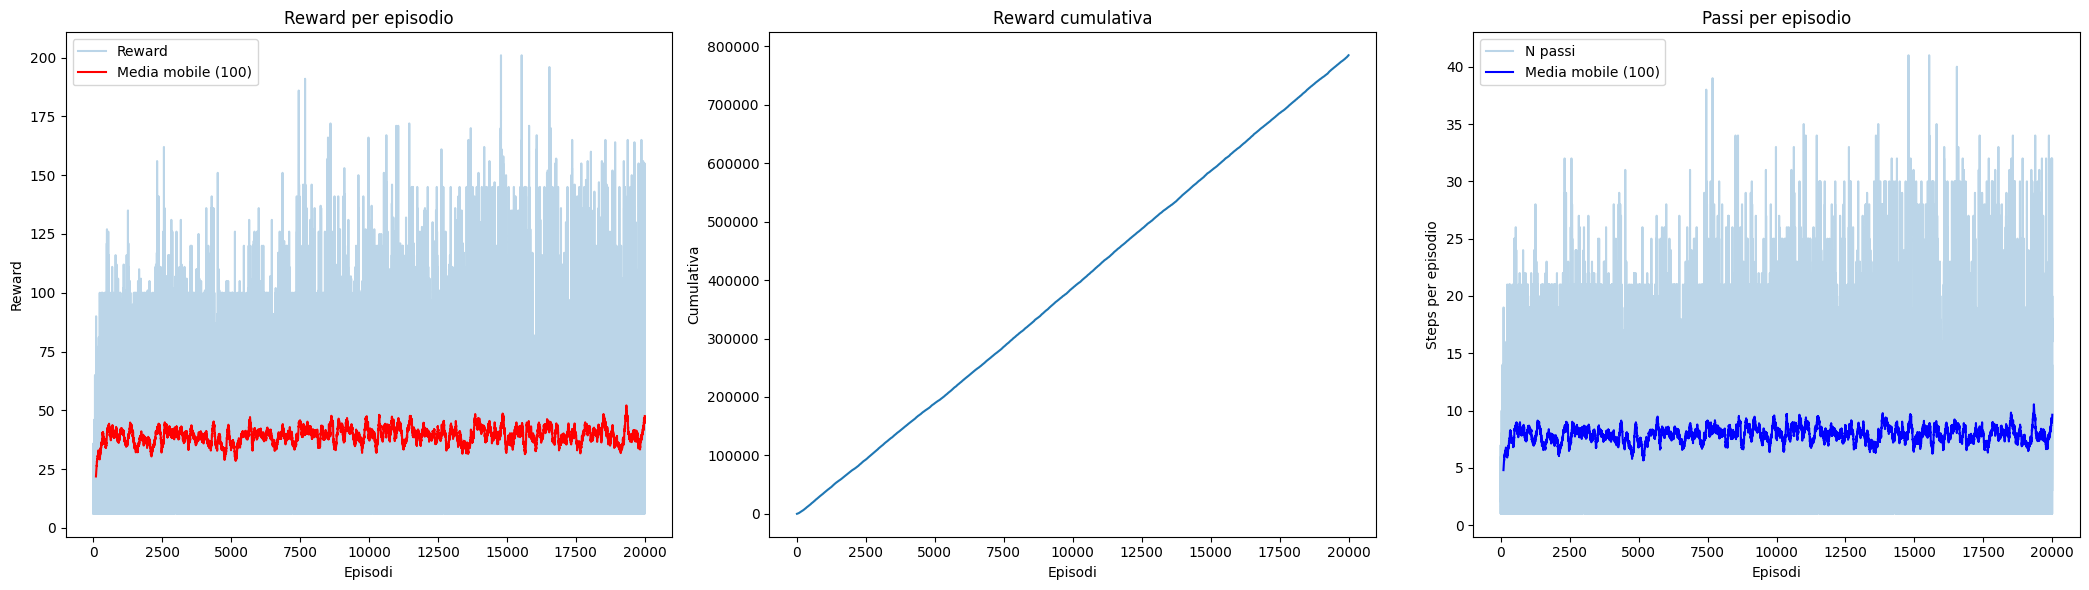

In [ ]:
#carichiamo env maximal attack
env=gym.make("idsgame-maximal_attack-v21").unwrapped

state_size = reset_env(env).flatten().shape[0]
action_size = env.num_defense_actions
device = 'cuda' if torch.cuda.is_available() else 'cpu'
agent = DDQNAgent(state_size, action_size, device)
#agent.load_checkpoint()
rewards, cumul, steps = train_ddqn(env, agent, n_episodes=20000, maximal_attack= True)
plot_learning(rewards, cumul, steps)